<a href="https://colab.research.google.com/github/diyapant-max/python-foundation/blob/main/data_cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI Impact on job market 2030

In [1]:
import pandas as pd
#Raw file URL from Github
raw_file_url = 'https://raw.githubusercontent.com/savitha14june/ai-impact-2030/refs/heads/main/AI_Impact_on_Jobs_2030.csv'

#Read csv file
df = pd.read_csv(raw_file_url)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

Data cleanup

In [2]:
#Remove duplicates
df.drop_duplicates(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

In [ ]:
#Check unique values
print(df['Job_Title'].unique())
print(df['Education_Level'].unique())
print(df['Risk_Category'].unique())

['Security Guard' 'Research Scientist' 'Construction Worker'
 'Software Engineer' 'Financial Analyst' 'AI Engineer' 'Mechanic'
 'Teacher' 'HR Specialist' 'Customer Support' 'UX Researcher' 'Lawyer'
 'Data Scientist' 'Graphic Designer' 'Retail Worker' 'Doctor'
 'Truck Driver' 'Chef' 'Nurse' 'Marketing Manager']
["Master's" 'PhD' 'High School' "Bachelor's"]
['High' 'Low' 'Medium']


In [5]:
#Write df to cleanup file
df.to_csv('ai_impact_data_cleanup.csv', index=False)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns



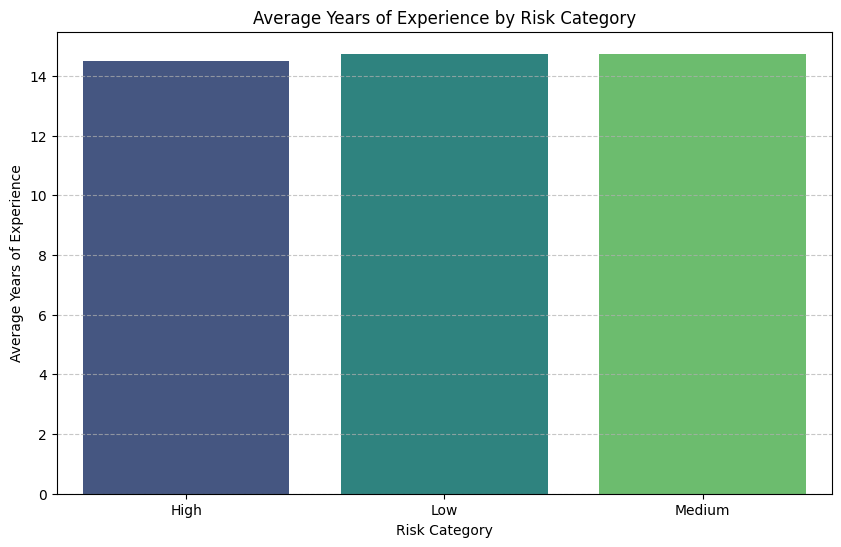

In [20]:
avg_years_experience_by_risk = df.groupby('Risk_Category')['Years_Experience'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Risk_Category', y='Years_Experience', hue='Risk_Category', data=avg_years_experience_by_risk, palette='viridis', legend=False)
plt.title('Average Years of Experience by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Average Years of Experience')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The analysis revealed that Risk_Category is a strong predictor of Automation_Probability_2030. However, Years_Experience does not appear to have a significant direct correlation with Automation_Probability_2030, either overall or within individual Risk_Category groups.


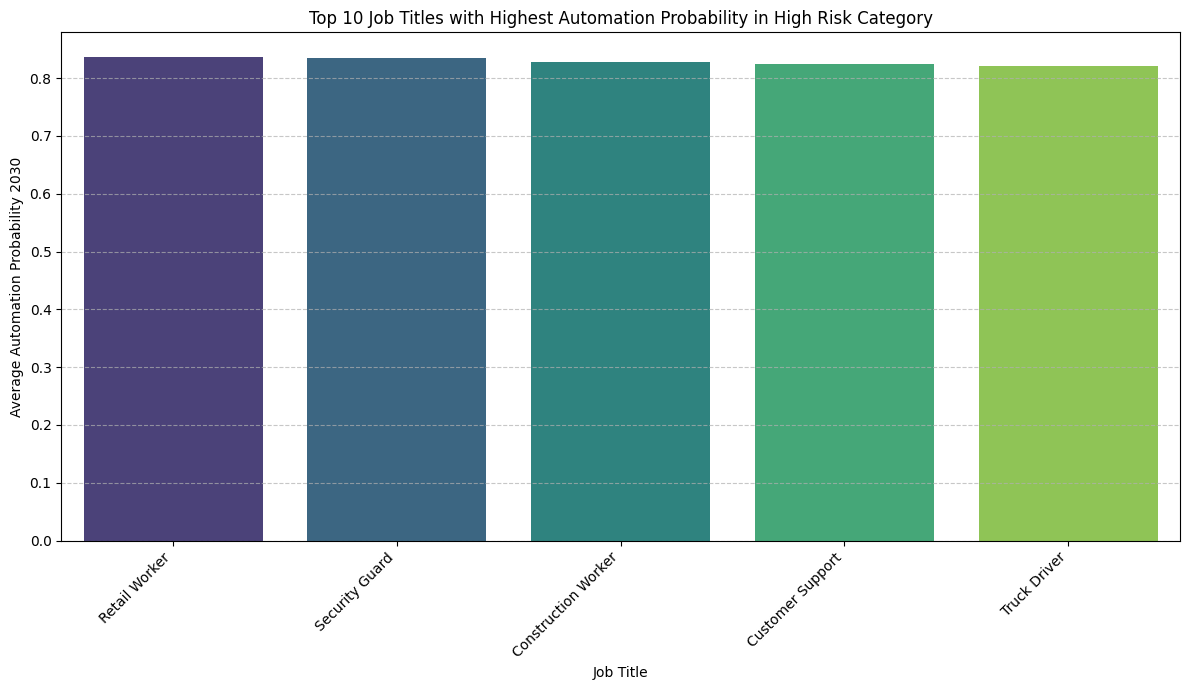

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

high_risk_jobs = df[df['Risk_Category'] == 'High']
top_10_high_risk_jobs = high_risk_jobs.groupby('Job_Title')['Automation_Probability_2030'].mean().nlargest(10).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Job_Title', y='Automation_Probability_2030', hue='Job_Title', data=top_10_high_risk_jobs, palette='viridis', legend=False)
plt.title('Top 10 Job Titles with Highest Automation Probability in High Risk Category')
plt.xlabel('Job Title')
plt.ylabel('Average Automation Probability 2030')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()